In [1]:
# Chichenpox database analysis

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Skapa en dataframe från csv-filen och konvertera datum till datetime-format
df = pd.read_csv('hungary_chickenpox.csv')
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")

In [ ]:
# Analisera data
print(df.shape, '\n')
print(df.head(), '\n')
print(df.info(), '\n')
print(df.describe(), '\n')

# Kolla om det finns några null-värden
print(df.isnull().sum())



In [ ]:
# Skapa en databas med totala antalet fall per år

lista_year = df['Date'].dt.strftime('%Y').unique()
print(f'Data is from {lista_year.min()} to {lista_year.max()}')

df_year = pd.DataFrame()
df_year = df.groupby(df['Date'].dt.strftime('%Y')).sum()
print(df_year)

# printa ut en graf för varje år
for i in df_year.columns:
    print(i, '\n')
    plt.figure(figsize=(10, 5))
    plt.bar(df_year.index, df_year[i])
    plt.title(i)
    plt.xlabel('Year')
    plt.ylabel('Total number of cases per year')
    plt.show()


In [38]:
# Skapa en databas med medelvärdet per år
df_mean = df_year.describe()

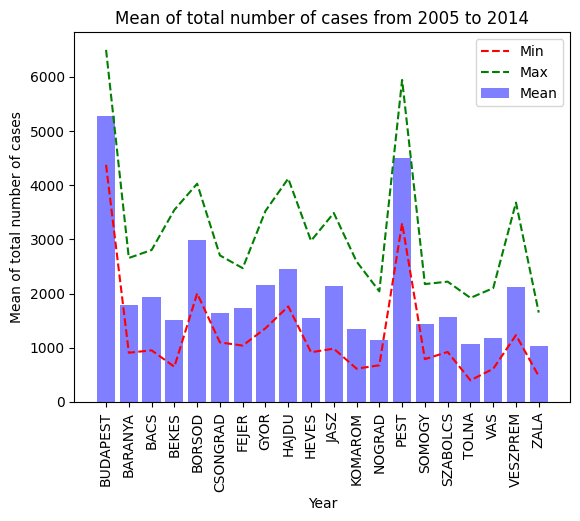

In [37]:
# printa ut en graf för medelvärdet per stad och år samt min och max
plt.bar(df_mean.columns, df_mean.loc['mean'], color='blue', alpha=0.5)
plt.plot(df_mean.columns, df_mean.loc['min'], color='red', linestyle='dashed')
plt.plot(df_mean.columns, df_mean.loc['max'], color='green', linestyle='dashed')
plt.title(f'Mean of total number of cases from {lista_year.min()} to {lista_year.max()}')
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.ylabel('Mean of total number of cases')
plt.legend(['Min', 'Max', 'Mean'])
plt.show()